In [48]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import random
import healpy as hp

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp

In [49]:
os.getenv('ENDPOINT_URL') 

'http://rook-ceph-rgw-nautiluss3.rook'

## Read in Tables

In [50]:
tbl_file1 = 's3://llc/Tables/test_modis2012.parquet'
llc_table1 = ulmo_io.load_main_table(tbl_file1)

Read main table: s3://llc/Tables/test_modis2012.parquet


In [94]:
llc_table1['DT'] = llc_table1.Tmax - llc_table1.Tmin
llc_table1['DT_p'] = llc_table1.T90 - llc_table1.T10

In [52]:
tbl_file2 = 's3://llc/Tables/ulmo2_test.parquet'
llc_table2 = ulmo_io.load_main_table(tbl_file2)

Read main table: s3://llc/Tables/ulmo2_test.parquet


## Add columns

In [38]:
with h5py.File('LLC_modis2012_SST_noise_demean_preproc.h5', 'r') as f:
    DT = np.empty( (635295,))
    DT_p = np.empty( (635295,))
    
    for idx in range(635295):
        img = f['valid'][idx, 0, ...]
        DT[idx] = np.max(img) - np.min(img)
        DT_p[idx] = np.percentile(img, 90) - np.percentile(img, 10)
        

#### Read in temp: DT, DT_p

In [53]:
tbl = llc_table2.sort_values('pp_idx')
tbl.index

Int64Index([248464,  41335, 499377, 594819, 414806, 457889, 523802,  77215,
            524092, 295330,
            ...
            428472, 257004, 258642, 162989, 211810, 414618, 299184, 149139,
            595987, 194382],
           dtype='int64', length=635295)

In [54]:
DT_object = pd.Series(data = DT, index = tbl.index)
DT_pobject = pd.Series(data = DT_p, index = tbl.index)

In [55]:
llc_table2['DT'] = DT_object
llc_table2['DT_p'] = DT_pobject

In [56]:
llc_table2.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_idx,lat,lon,row,col,datetime,filename,LL,DT,DT_p
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.126851,3.401999,6.411,...,296266,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,125.096680,3.244998,1.905836
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315916,3.464000,6.544,...,592057,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,54.587036,3.310368,2.684754
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.914161,3.557000,6.852,...,214472,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,161.426941,3.404922,1.104147
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859090,3.442000,6.709,...,467098,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,172.175171,3.389626,1.119379
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.130058,5.386000,6.852,...,415175,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,148.350830,1.679090,1.023413


# Basic Plots 

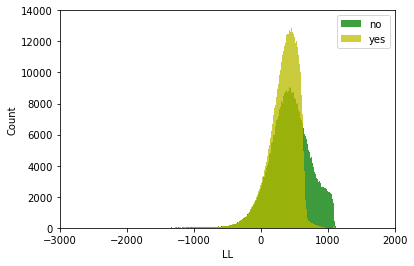

In [223]:
ax = sns.histplot(data= llc_table1, x = 'LL', color = 'g', stat = 'count', label = 'no', binwidth = 10)
ax = sns.histplot(data= llc_table2, x = 'LL', color = 'y', stat = 'count', label = 'yes', binwidth = 10)
ax.set_xlim(-3000., 2000.)
ax.set_ylim(0., 14000)
ax.legend()

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


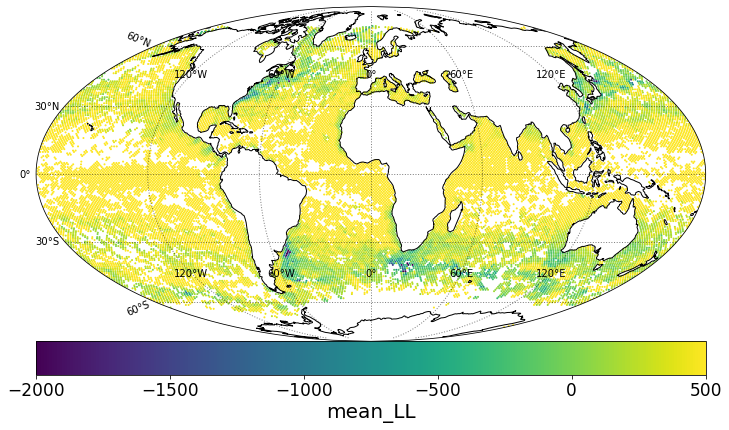

In [11]:
_ = sp.show_avg_LL(llc_table1, lbl = True)

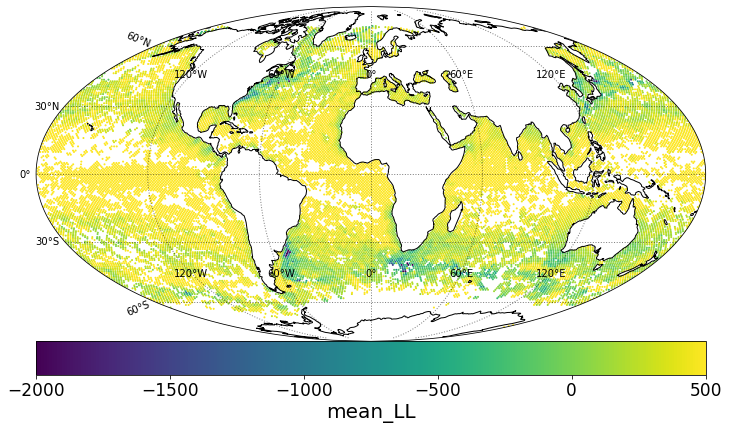

In [12]:
_ = sp.show_avg_LL(llc_table2, lbl = True)

## Noise vs no noise

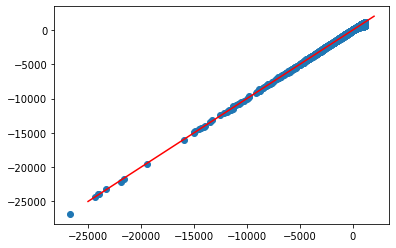

In [69]:
ax = plt.scatter( x = llc_table1.LL, y = llc_table2.LL)
x = np.linspace(-25000, 2000, 100)
ax = plt.plot([-25000, 2000], [-25000, 2000], 'r-')
#plt.xlim( -5000, 2000)
#plt.ylim(-6000, 2000)

(-1000.0, 2000.0)

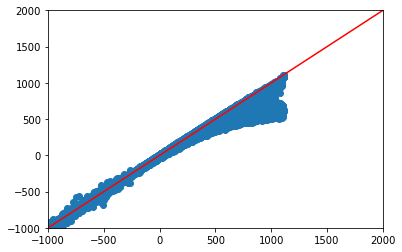

In [68]:
ax = plt.scatter( x = llc_table1.LL, y = llc_table2.LL)

ax = plt.plot([-25000, 2000], [-25000, 2000], 'r-')
plt.xlim( -1000, 2000)
plt.ylim(-1000, 2000)

# Upper end of LL distribution

In [95]:
upper1 = llc_table1[ llc_table1.LL > 500]
upper2 = llc_table2[ llc_table1.LL > 500]

(-1000.0, 2000.0)

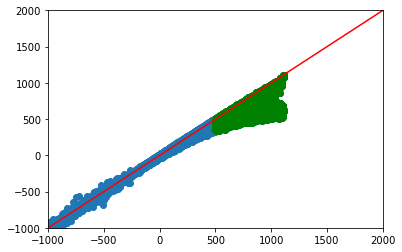

In [112]:
ax = plt.scatter( x = llc_table1.LL, y = llc_table2.LL)
ax = plt.scatter( x = upper1.LL, y =upper2.LL, c='g')

ax = plt.plot([-25000, 2000], [-25000, 2000], 'r-')
#ax = plt.plot([-25000, 2000], [-22500, 1800], 'r-') # 0.9 * LL
#ax = plt.plot([-25000, 2000], [-15000, 1200], 'r-') # 0.6 * LL
plt.xlim( -1000, 2000)
plt.ylim(-1000, 2000)

### Absolute Temperature Range: DT

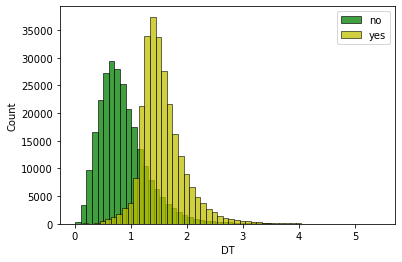

In [97]:
ax = sns.histplot(data= upper1, x = 'DT', color = 'g', stat = 'count', label = 'no', binwidth = 0.1)
ax = sns.histplot(data= upper2, x = 'DT', color = 'y', stat = 'count', label = 'yes', binwidth = 0.1)
ax.legend()

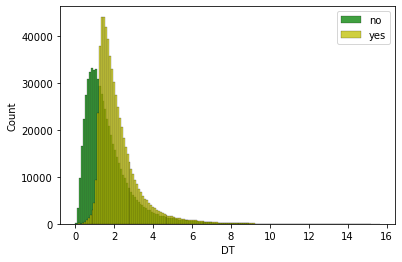

In [221]:
ax = sns.histplot(data= llc_table1, x = 'DT', color = 'g', stat = 'count', label = 'no', binwidth = 0.1)
ax = sns.histplot(data= llc_table2, x = 'DT', color = 'y', stat = 'count', label = 'yes', binwidth = 0.1)
ax.legend()

### Temperature Range: T90 - T10

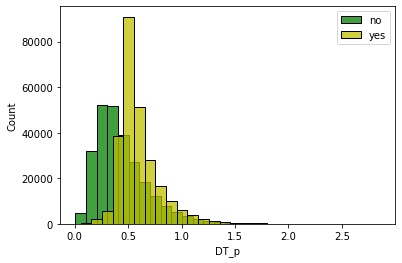

In [98]:
ax = sns.histplot(data= upper1, x = 'DT_p', color = 'g', stat = 'count', label = 'no', binwidth = 0.1)
ax = sns.histplot(data= upper2, x = 'DT_p', color = 'y', stat = 'count', label = 'yes', binwidth = 0.1)
ax.legend()

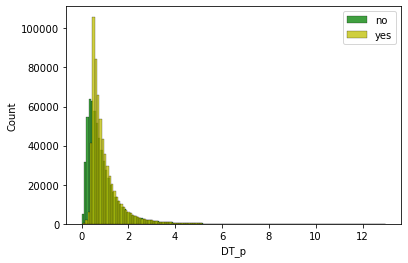

In [222]:
ax = sns.histplot(data= llc_table1, x = 'DT_p', color = 'g', stat = 'count', label = 'no', binwidth = 0.1)
ax = sns.histplot(data= llc_table2, x = 'DT_p', color = 'y', stat = 'count', label = 'yes', binwidth = 0.1)
ax.legend()

### DT Joint Plot

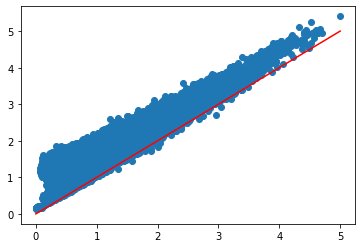

In [99]:
ax = plt.scatter( x = upper1.DT, y = upper2.DT)
ax = plt.plot([0, 5], [0, 5], 'r-')


### T90 - T10 Joint Plot

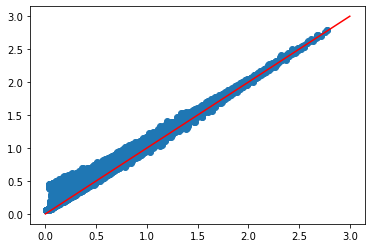

In [101]:
ax = plt.scatter( x = upper1.DT_p, y = upper2.DT_p)
ax = plt.plot([0, 3], [0, 3], 'r-')


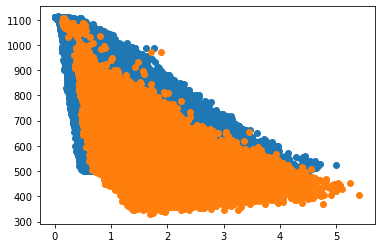

In [108]:
ax = plt.scatter( x = upper1.DT, y = upper1.LL)
ax = plt.scatter( x = upper2.DT, y = upper2.LL)



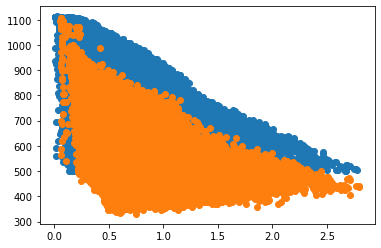

In [109]:
ax = plt.scatter( x = upper1.DT_p, y = upper1.LL)
ax = plt.scatter( x = upper2.DT_p, y = upper2.LL)

# Slice into upper end

In [132]:
sliver1 = llc_table1[ (llc_table1.LL < 1050) & (llc_table1.LL > 950) ]
sliver2 = llc_table2[ (llc_table1.LL < 1050) & (llc_table1.LL > 950) ]

#### Seperate those who stayed close and those who spread away

In [161]:
LL_diff = np.abs(sliver2.LL - sliver1.LL)
LL_diff99 = np.percentile( LL_diff, 99)
LL_diff1 = np.percentile( LL_diff, 1)

In [227]:
close1 = sliver1[ LL_diff < LL_diff1] 
far1 = sliver1[ LL_diff > LL_diff99] 

In [228]:
close2 = sliver2[ LL_diff < LL_diff1] 
far2 = sliver2[ LL_diff > LL_diff99] 

In [165]:
close2.shape[0]

239

#### Plot

(0.0, 1500.0)

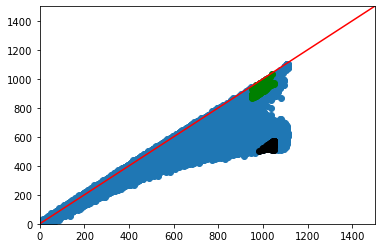

In [229]:
ax = plt.scatter( x = llc_table1.LL, y = llc_table2.LL)
ax = plt.scatter( x = close1.LL, y =close2.LL, c='g')
ax = plt.scatter( x = far1.LL, y =far2.LL, c='k')

ax = plt.plot([-25000, 2000], [-25000, 2000], 'r-')
#ax = plt.plot([-25000, 2000], [-22500, 1800], 'r-') # 0.9 * LL
#ax = plt.plot([-25000, 2000], [-15000, 1200], 'r-') # 0.6 * LL
plt.xlim( 0, 1500)
plt.ylim(0, 1500)

#### Pick 4 random cutouts

In [187]:
li = np.random.randint(0, close2.shape[0], 4)

In [188]:
close2.iloc[li[0]].pp_idx

513115

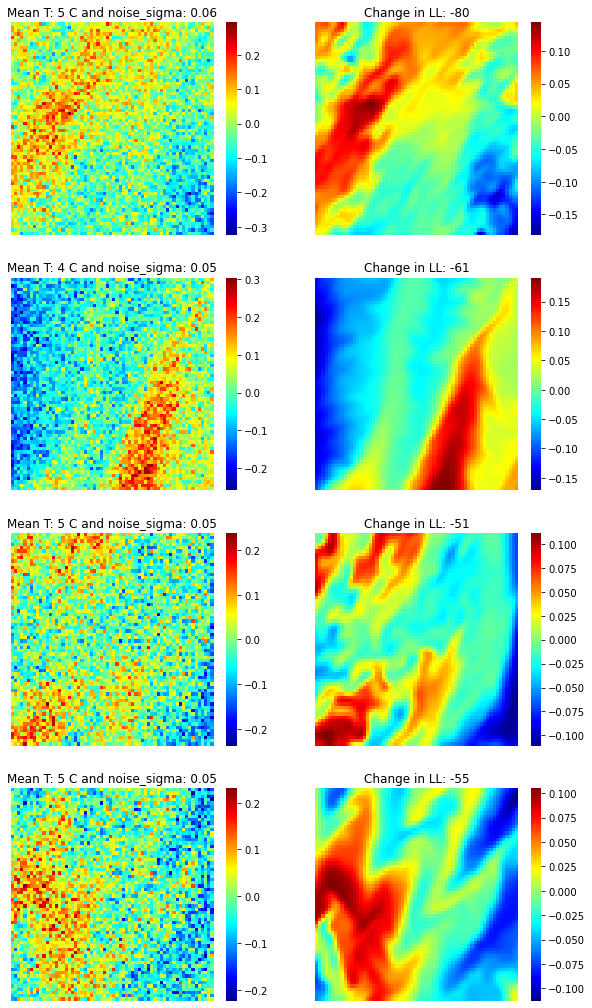

In [220]:
fig, axes = plt.subplots(4, 2, figsize = (10,18) )

_, cm = ulmo_plotting.load_palette()

with h5py.File('/home/jovyan/ulmo/ulmo/notebooks/LLC_modis2012_SST_noise_demean_preproc.h5', 'r') as pp_hf1:
    
    with h5py.File('/home/jovyan/ulmo/ulmo/notebooks/LLC_modis2012_test_preproc.h5', 'r') as pp_hf2:
    
        for i, num in enumerate(li): 
            idx = close2.iloc[num].pp_idx
        
            tmp = float( pp_hf2['valid_metadata'][idx,7].decode() ) 
    
            img1 = pp_hf1['valid'][idx, 0, ...]
            img2 = pp_hf2['valid'][idx, 0, ...]
            
            g = sns.heatmap(np.flipud(img1), xticklabels = [], yticklabels = [], cmap=cm, ax = axes[i, 0])
            h = sns.heatmap(np.flipud(img2), xticklabels = [], yticklabels = [], cmap=cm, ax = axes[i, 1])
            g.set_title('Mean T: {} C and noise_sigma: {}'.format(round(tmp), round(0.031 + 0.0048*tmp, 2)))
            h.set_title('Change in LL: {}'.format(round(close2.iloc[num].LL - close1.iloc[num].LL)))

In [190]:
li = np.random.randint(0, far2.shape[0], 4)

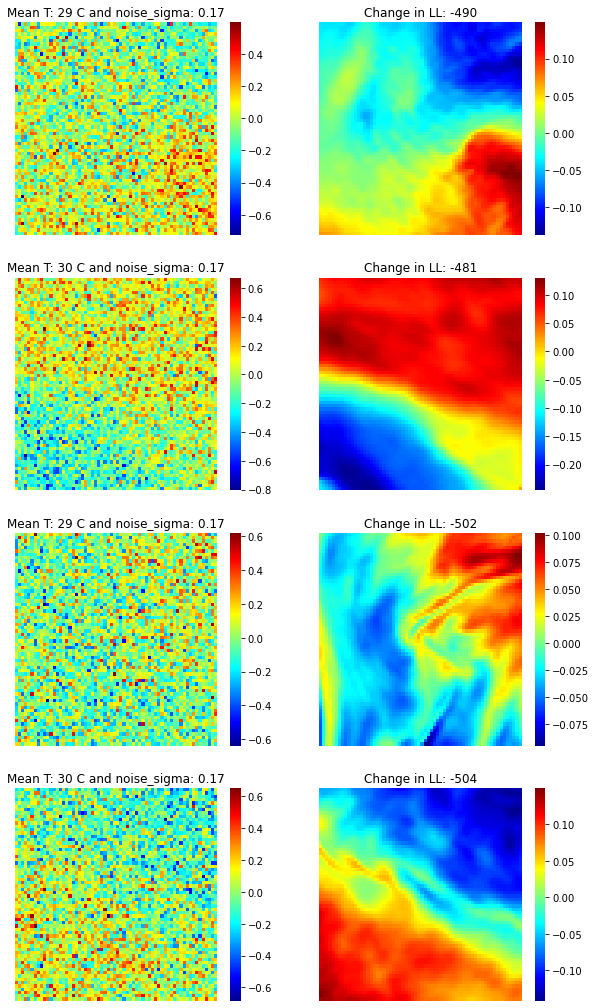

In [219]:
fig, axes = plt.subplots(4, 2, figsize = (10,18) )

_, cm = ulmo_plotting.load_palette()

with h5py.File('/home/jovyan/ulmo/ulmo/notebooks/LLC_modis2012_SST_noise_demean_preproc.h5', 'r') as pp_hf1:
    
    with h5py.File('/home/jovyan/ulmo/ulmo/notebooks/LLC_modis2012_test_preproc.h5', 'r') as pp_hf2:
    
        for i, num in enumerate(li): 
            idx = far2.iloc[num].pp_idx
        
            tmp = float( pp_hf2['valid_metadata'][idx,7].decode() ) 
    
            img1 = pp_hf1['valid'][idx, 0, ...]
            img2 = pp_hf2['valid'][idx, 0, ...]
            
            g = sns.heatmap(np.flipud(img1), xticklabels = [], yticklabels = [], cmap=cm, ax = axes[i, 0])
            h = sns.heatmap(np.flipud(img2), xticklabels = [], yticklabels = [], cmap=cm, ax = axes[i, 1])
            g.set_title('Mean T: {} C and noise_sigma: {}'.format(round(tmp), round(0.031 + 0.0048*tmp, 2)))
            h.set_title('Change in LL: {}'.format(round(far2.iloc[num].LL - far1.iloc[num].LL)))

Text(0.5, 1.0, 'Close: DT_p')

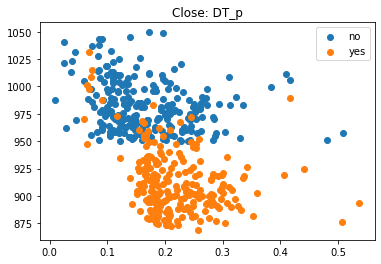

In [197]:
ax = plt.scatter( x = close1.DT_p, y = close1.LL, label = 'no')
ax = plt.scatter( x = close2.DT_p, y = close2.LL, label = 'yes')
plt.legend()
plt.title('Close: DT_p')

Text(0.5, 1.0, 'Far: DT_p')

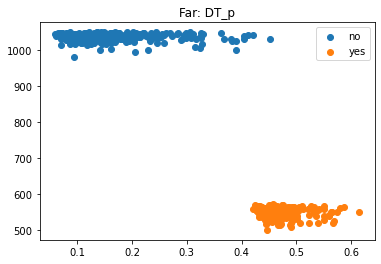

In [199]:
ax = plt.scatter( x = far1.DT_p, y = far1.LL, label = 'no')
ax = plt.scatter( x = far2.DT_p, y = far2.LL, label = 'yes')
plt.legend()
plt.title('Far: DT_p')

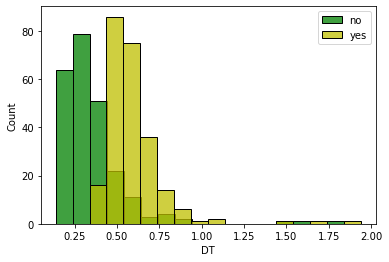

In [215]:
ax = sns.histplot(data= close1, x = 'DT', color = 'g', stat = 'count', label = 'no', binwidth = 0.1)
ax = sns.histplot(data= close2, x = 'DT', color = 'y', stat = 'count', label = 'yes', binwidth = 0.1)
ax.legend()

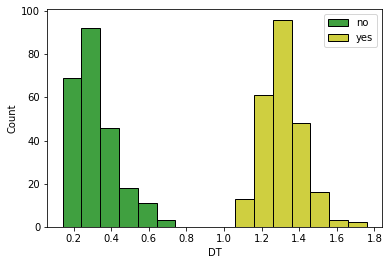

In [216]:
ax = sns.histplot(data= far1, x = 'DT', color = 'g', stat = 'count', label = 'no', binwidth = 0.1)
ax = sns.histplot(data= far2, x = 'DT', color = 'y', stat = 'count', label = 'yes', binwidth = 0.1)
ax.legend()